<a href="https://colab.research.google.com/github/ADHIL-VENGAT/CE888-DataScience-and-Decision-making/blob/main/Assignment_1_IHDP_(22_02_22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import SCORERS
from sklearn.metrics import f1_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/dmachlanski/CE888_2022/main/project/data/ihdp.csv')
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.244050,5.269701,4.598246
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.253175,8.393338,0.940855
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.908235,6.897207,4.373736
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8.324520,9.208251,0.352653


# Exploratory Data Analysis
In EDA We will Analyze :
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers

## 1.  Missing Values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      747 non-null    float64
 1   x2      747 non-null    float64
 2   x3      747 non-null    float64
 3   x4      747 non-null    float64
 4   x5      747 non-null    float64
 5   x6      747 non-null    float64
 6   x7      747 non-null    float64
 7   x8      747 non-null    float64
 8   x9      747 non-null    float64
 9   x10     747 non-null    float64
 10  x11     747 non-null    float64
 11  x12     747 non-null    float64
 12  x13     747 non-null    float64
 13  x14     747 non-null    float64
 14  x15     747 non-null    float64
 15  x16     747 non-null    float64
 16  x17     747 non-null    float64
 17  x18     747 non-null    float64
 18  x19     747 non-null    float64
 19  x20     747 non-null    float64
 20  x21     747 non-null    float64
 21  x22     747 non-null    float64
 22  x2

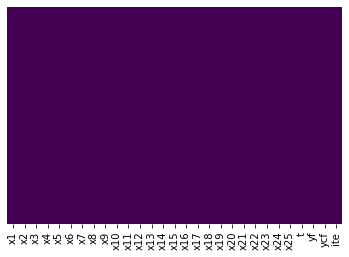

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There are no null values in the dataset

#  2. Analyzing Numerical and Categorical Features

In [5]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  29


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t,yf,ycf,ite
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.771232,-0.298509,4.657928
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.956273,5.783770,3.428604
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.164164,7.055789,3.658195
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.172307,1.379697,4.585505
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.834469,2.747986,4.265591


There are no categorical features , all are numerical features

# 2A. ----> Discrete features in numerical features

In [6]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 22


In [7]:
discrete_feature

['x3',
 'x4',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20',
 'x21',
 'x22',
 'x23',
 'x24',
 'x25',
 't']

# 2B. ----> Contineous features in numerical features


In [8]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 7


In [9]:
continuous_feature

['x1', 'x2', 'x5', 'x6', 'yf', 'ycf', 'ite']

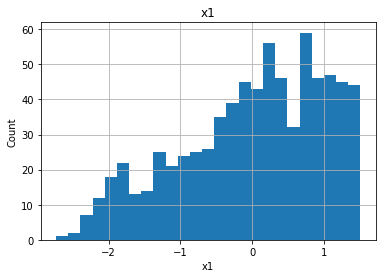

x1  skew score ---->  -0.51286916154474


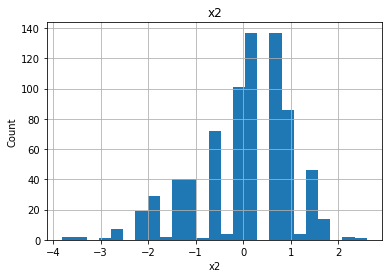

x2  skew score ---->  -0.7006995884365952


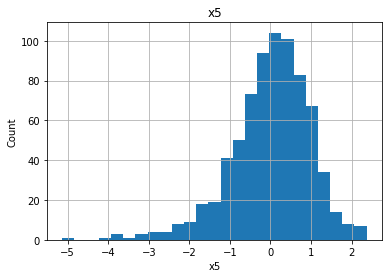

x5  skew score ---->  -0.913498149641234


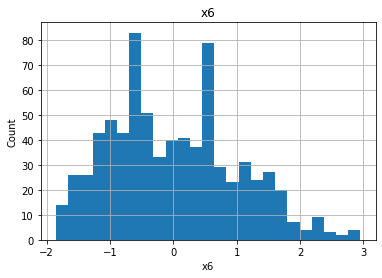

x6  skew score ---->  0.39949816076312994


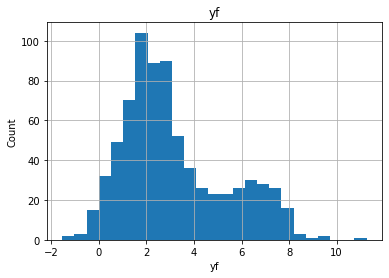

yf  skew score ---->  0.7280326738928113


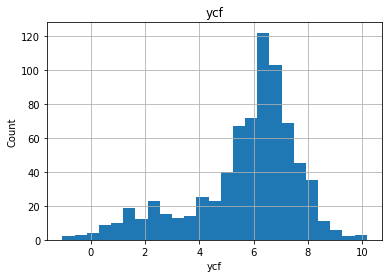

ycf  skew score ---->  -1.0293356760697916


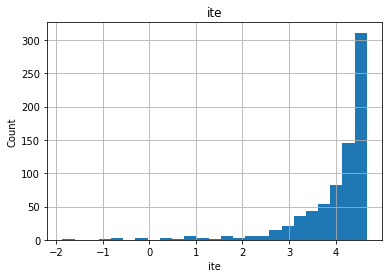

ite  skew score ---->  -2.7736406230117785


In [10]:
## Lets analyse the continuous values by creating histograms to understand the distribution and the skewness
from scipy.stats import skew
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    print(feature,' skew score ----> ',skew(data[feature]))

We are having right and left skewed features. Hence our dataset is skewed

In [11]:
continuous_feature

['x1', 'x2', 'x5', 'x6', 'yf', 'ycf', 'ite']

# Hist plot of continous feature and Target

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd306949310>,
      dtype=object)

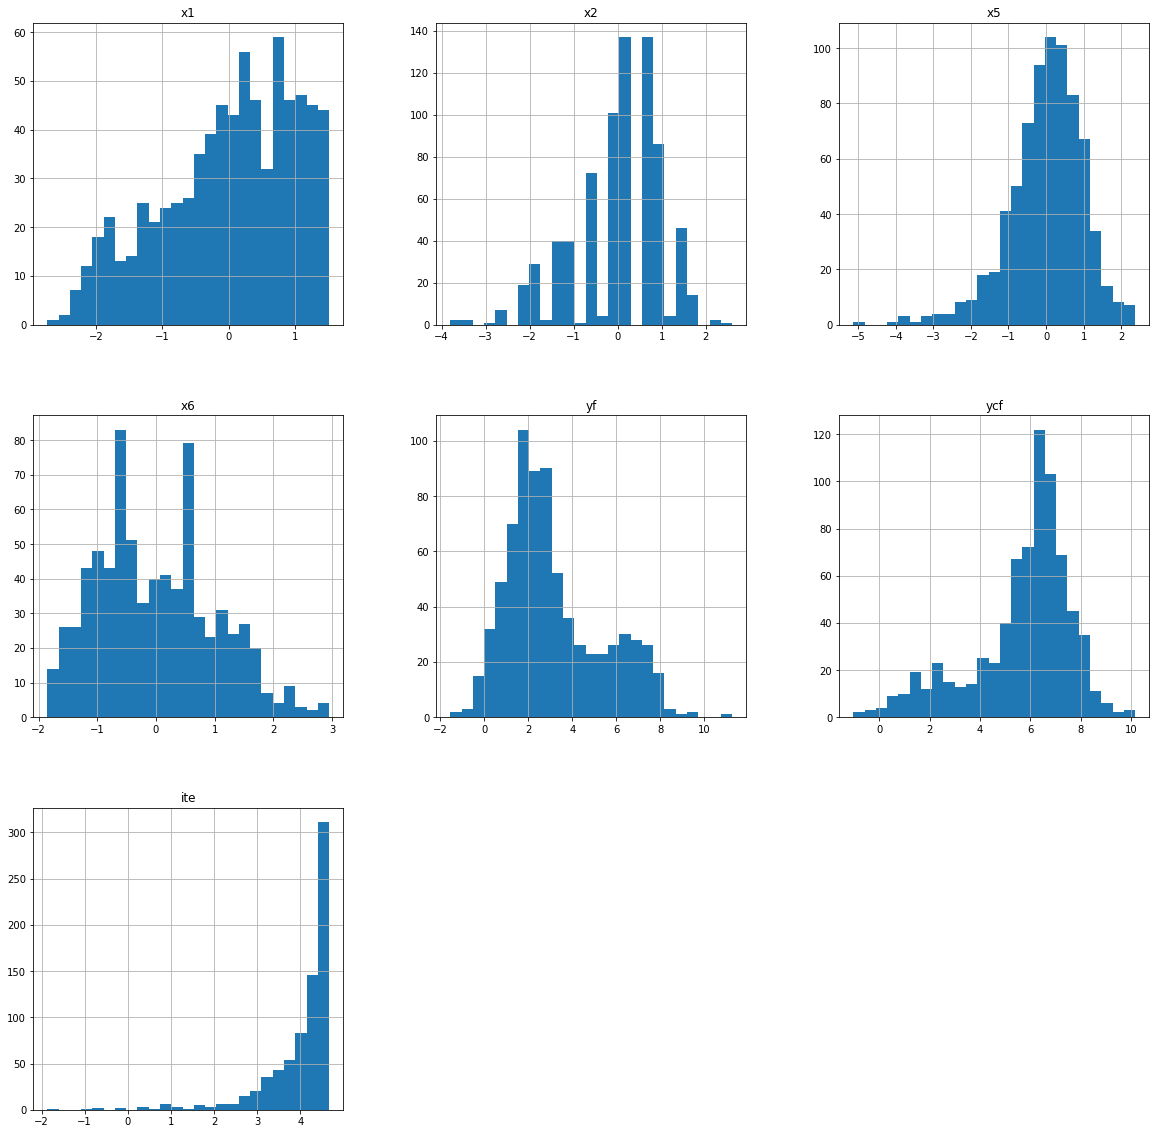

In [12]:
data[continuous_feature].hist(bins=25,figsize=(20,20))

# 3. Analysing outliers

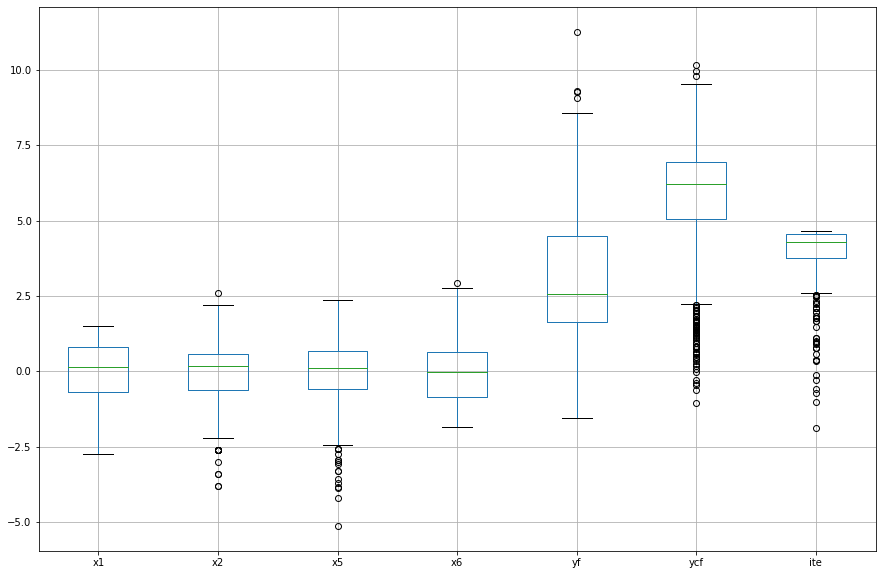

In [13]:

data.boxplot(column=continuous_feature,figsize=(15,10))

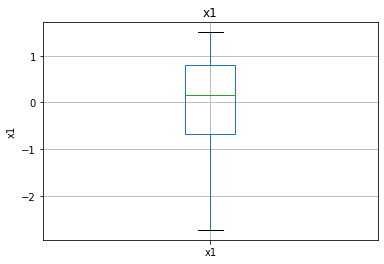

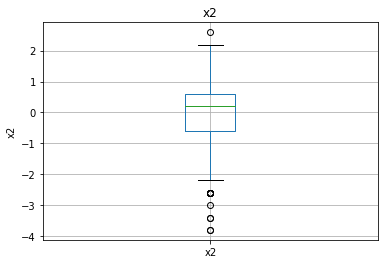

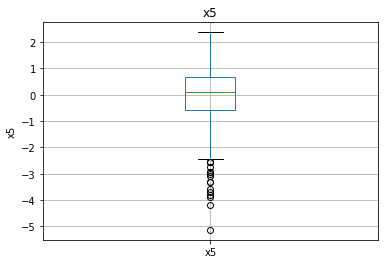

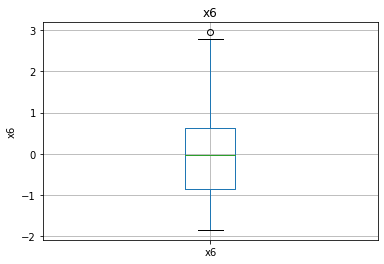

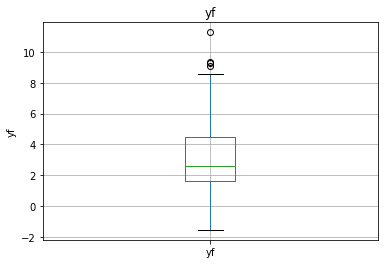

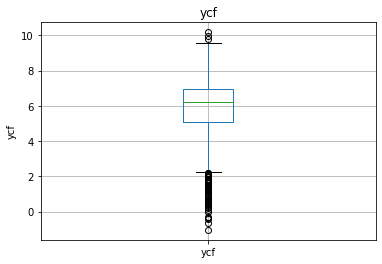

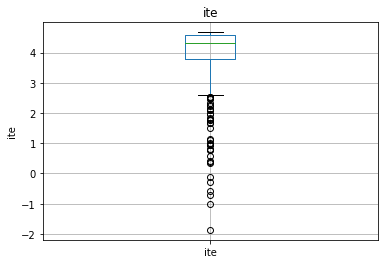

In [14]:
for feature in continuous_feature:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show() 


There are outliers that need to be dealt

# Pearson Correlation

In [15]:
data = df.copy

In [16]:
df.drop(['yf','ycf','ite'],axis=1)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,t
0,1.397395,0.996346,-1.105624,-0.879606,0.308569,-1.023402,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.269033,0.196818,0.383828,0.161703,-0.629189,1.460832,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.051537,1.795874,-1.105624,0.161703,-0.629189,0.963985,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.662446,0.196818,-0.733261,-0.879606,0.371086,-0.692171,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.856992,1.795874,0.011465,-0.879606,0.558638,0.301522,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,-1.853672,-2.201766,1.500917,0.161703,-0.129052,-1.023402,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
743,-1.066845,-1.402238,1.128554,2.244320,0.371086,2.288910,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
744,-1.045229,-1.337276,1.128554,-0.879606,0.683672,0.301522,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
745,-0.115735,-0.602710,-1.105624,2.244320,0.558638,2.785756,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
data = df.copy()
X = data.drop(['t','yf','ycf','ite'],axis=1)
Y = data['yf']
T = data['t']
ite = data['ite']

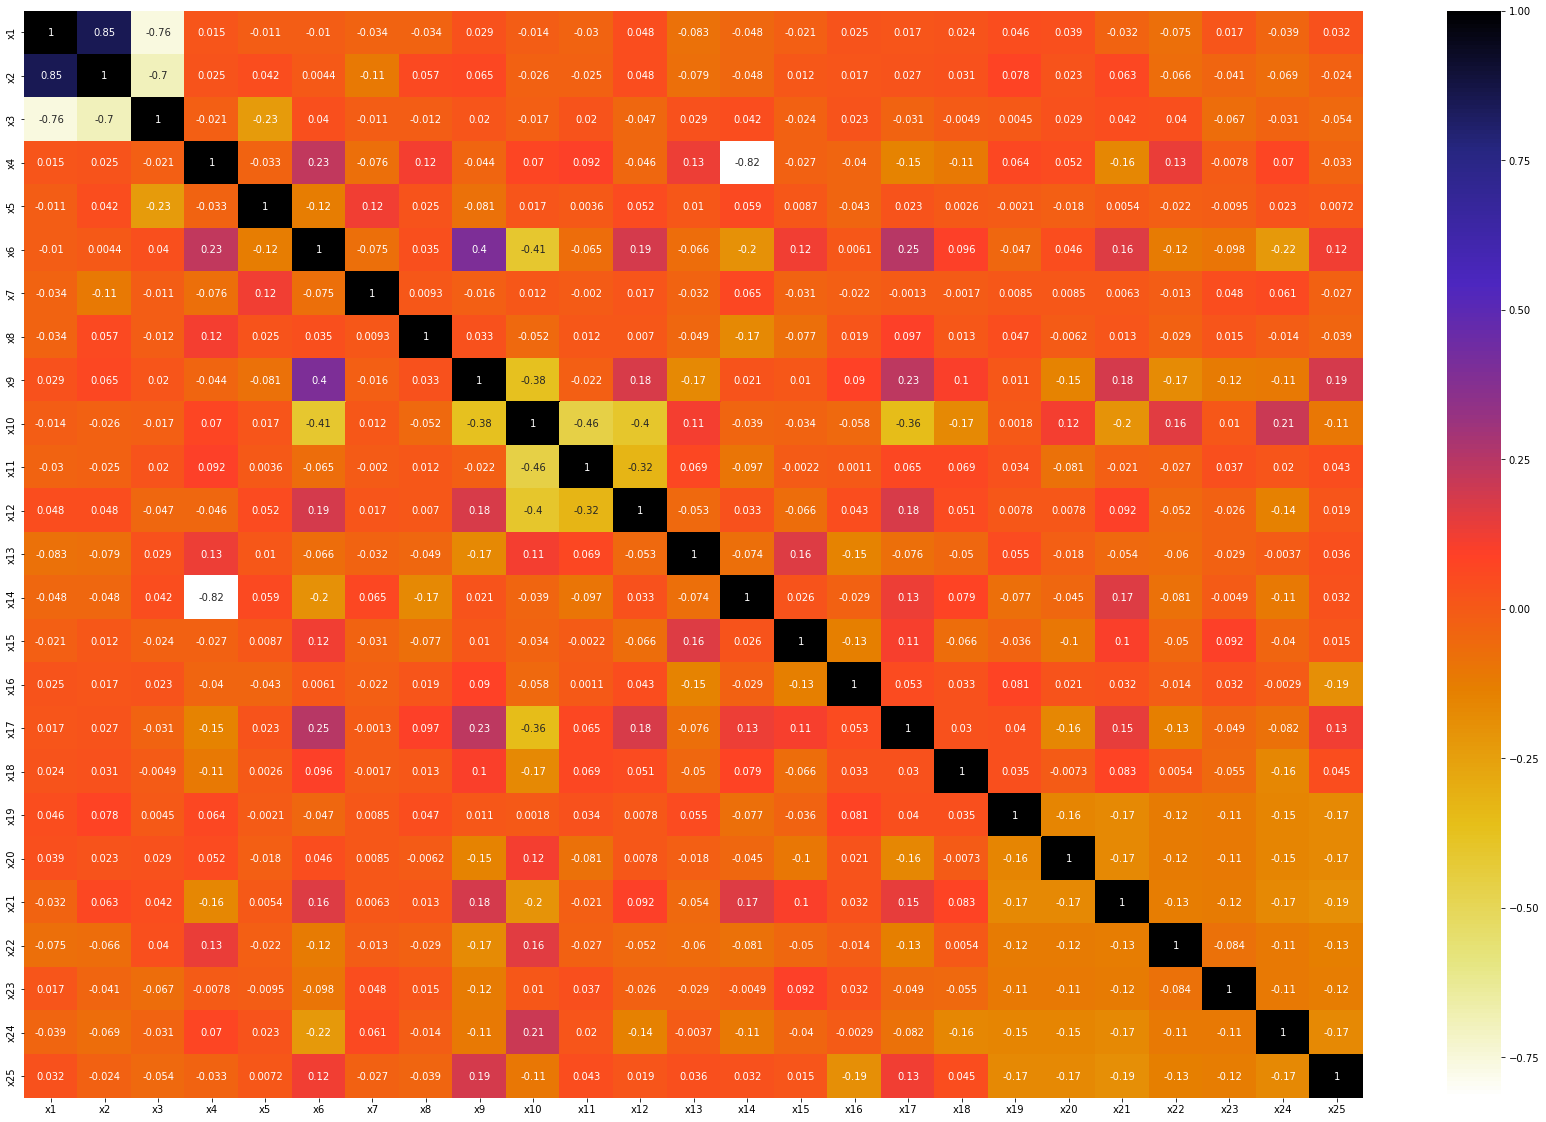

In [18]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [19]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with any other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
#we are gonna check for features having more than 80% correlation
corr_features = correlation(data, 0.8)
print('There are ', len(set(corr_features)),' highly correlated(>80%) features in the dataset')



There are  1  highly correlated(>80%) features in the dataset


In [22]:
#x1 nad x2 are highly correlated
corr_features

{'x2'}

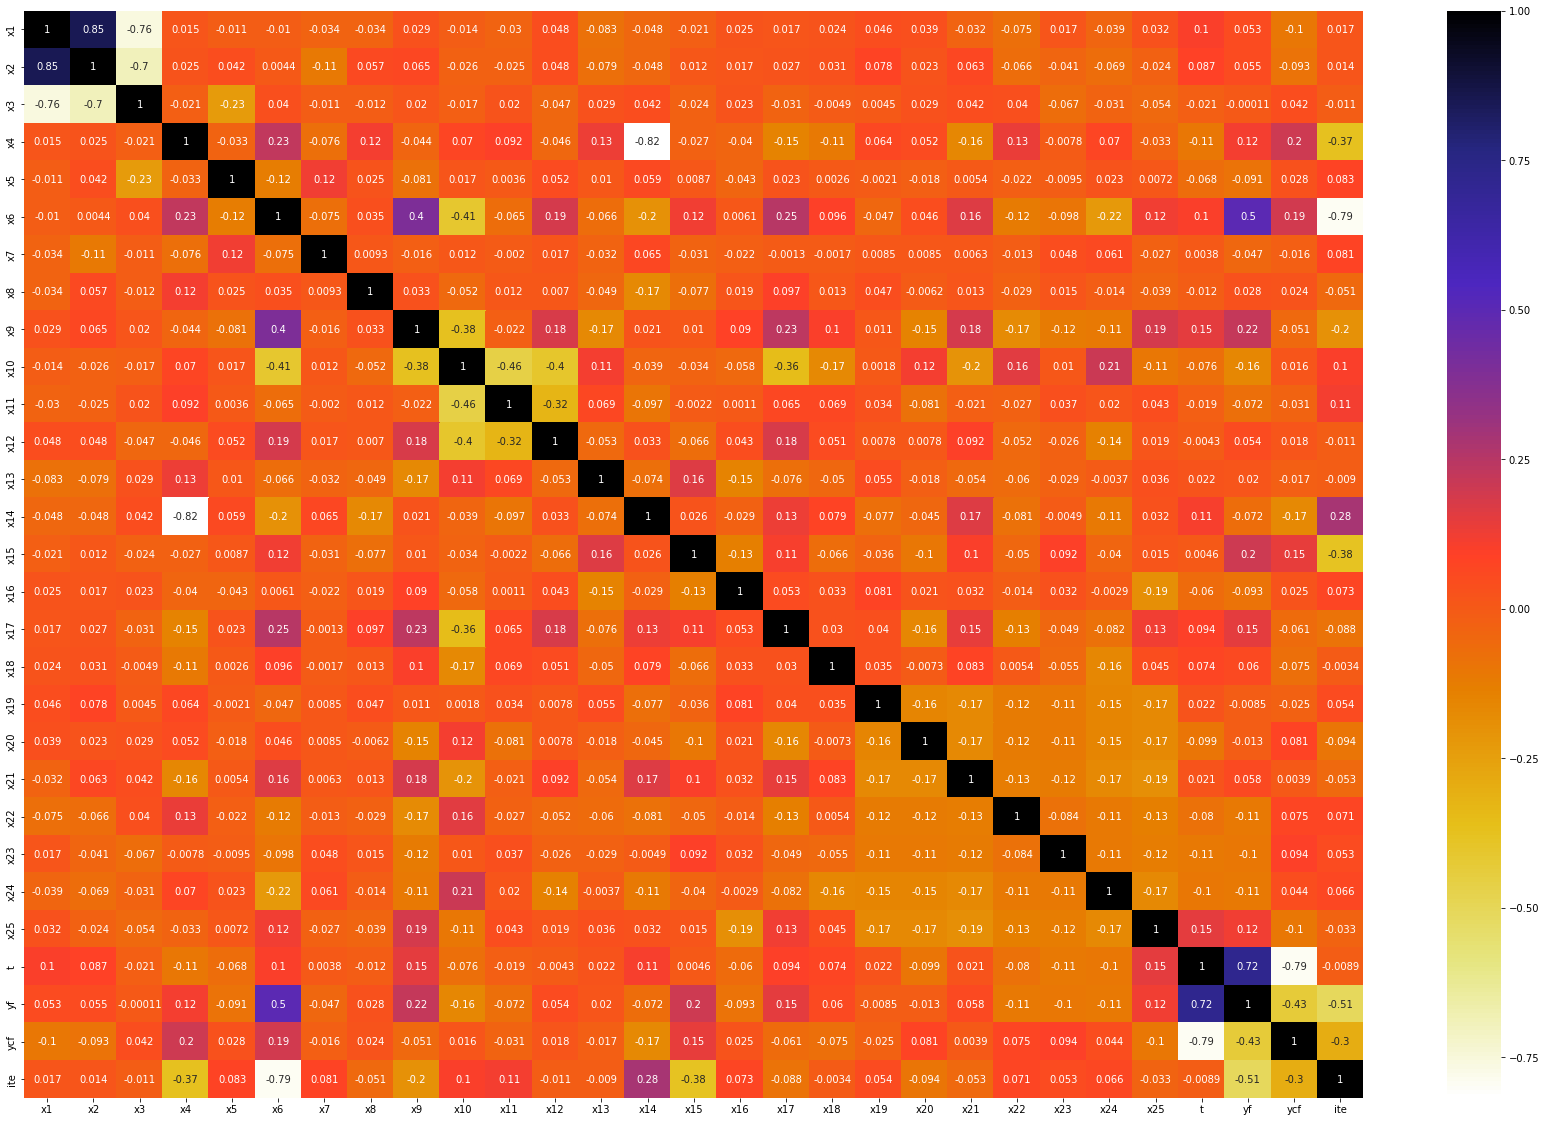

In [23]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [24]:
# featur 'x6' is highly correlated with factual outcome "yf"

# Histplot

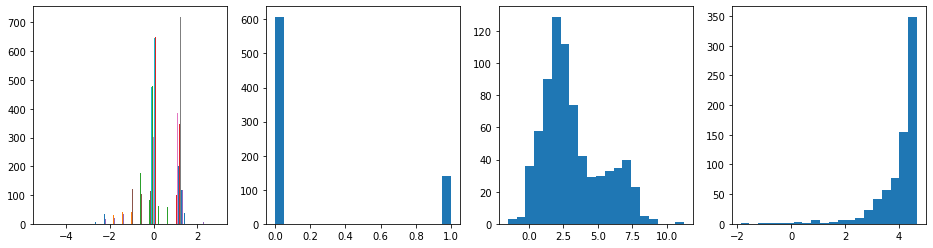

In [30]:
bins=20
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].hist(X, bins=bins)
axs[1].hist(T, bins=bins)
axs[2].hist(Y, bins=bins)
axs[3].hist(ite, bins=bins)
plt.show()

In [26]:
np.mean(ite)

4.016066896118339

# Test and Train split

In [27]:
data = df.copy()
X = np.array(data.drop(['t','yf','ycf','ite'],axis=1))
Y = np.array(data['yf']).reshape(-1,1)
T = np.array(data['t']).reshape(-1,1)
ite = data['ite']

In [32]:
x_train, x_test, t_train, t_test, y_train, y_test, ite_train, ite_test = train_test_split(X, T, Y, ite, test_size=0.2)

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [33]:
xt_train = np.concatenate([x_train, t_train], axis=1) 
xt0_test = np.concatenate([x_test, np.zeros_like(t_test)], axis=1)
xt1_test = np.concatenate([x_test, np.ones_like(t_test)], axis=1)

# Modelling

In [34]:
def get_ps_weights(clf, x, t):
  ti = np.squeeze(t)
  clf.fit(x, ti)
  ptx = clf.predict_proba(x).T[1].T + 0.0001 # add a small value to avoid dividing by 0
  # Given ti and ptx values, compute the weights wi (see formula above):
  wi =  ti/(ptx)  +  (1 - ti)/(1 - (ptx))
  return wi

In [35]:
# Get the sample weights
prop_clf = RandomForestClassifier()
weights = get_ps_weights(prop_clf, x_train, t_train)

# Train the regressor
rf_ipsw = RandomForestRegressor()

rf_ipsw.fit(xt_train, y_train.flatten(), sample_weight= weights )

# Make predictions
rf_ipsw_y0_test = rf_ipsw.predict(xt0_test)
rf_ipsw_y1_test = rf_ipsw.predict(xt1_test)

# Compute ITEs
rf_ipsw_te_test = rf_ipsw_y1_test - rf_ipsw_y0_test 


# Evaluation

In [36]:
def abs_ate(effect_true, effect_pred):
    """
    Absolute error for the Average Treatment Effect (ATE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: absolute error on ATE
    """
    return abs(sum(effect_true)/len(effect_true) - sum(effect_pred)/len(effect_pred))

def pehe(effect_true, effect_pred):
    """
    Precision in Estimating the Heterogeneous Treatment Effect (PEHE)
    :param effect_true: true treatment effect value
    :param effect_pred: predicted treatment effect value
    :return: PEHE
    """
    return np.sqrt(np.mean((effect_true - effect_pred)**2))

In [37]:
# Error on ATE
# Use our 'abs_ate' function, true ITEs and predicted ITEs to get the measurements.
rf_ipsw_ate_test = abs_ate(ite_test, rf_ipsw_te_test)

# PEHE
# Use our 'pehe' function, true ITEs and predicted ITEs to get the measurements.
rf_ipsw_pehe_test = pehe(ite_test, rf_ipsw_te_test)

In [38]:
results = []
results.append(['RF (IPW)', rf_ipsw_ate_test, rf_ipsw_pehe_test])
cols = ['Method', 'ATE test', 'PEHE test']

df = pd.DataFrame(results, columns=cols)
df

,Method,ATE test,PEHE test
0,RF (IPW),0.003817,0.569509
